In [13]:
from data_ingestion_tools import data_ingestion_tools
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## Table Of Contents

### [Data Preparation](#subsection-1)
The MNIST Data that has been downloaded will be converted into a Pandas DataFrame.

### [Neural Network](#subsection-2)
A Neural Network will be trained to classify the MNIST Data.

### [LE-NET 5 (Convolution Neural Network)](#subsection-3)
The Classic Convolution Neural Network, Le-NET 5, will be trained to classify the MNIST Data.

### [Model Comparison and Evaluation](#conclusion)
Comparison and Limitations of each Model will be explored.


#### <a id='subsection-1'>1. Data Preparation</a>

Training (as-well as Validation) and testing MNIST Data is prepared by:    
1. Firstly the function read_idx_file is called from the data_ingestion_toolkit class and the training and testing datasets is pulled.  
2. The labels are then encoded into one-hot format using the LabelEncoder and to_categorical functions from the scikit-learn and TensorFlow libraries, respectively.  
3. The images are flattened to create one-dimensional arrays using the reshape method, making them suitable for representation as rows in a Pandas DataFrame.  
4. Finally, two DataFrames (train_df and test_df) are created from the flattened image data, where each row corresponds to a flattened image in the training or testing dataset.

In [14]:
# call data_ingestion_toolbox
dit = data_ingestion_tools()


In [15]:
# Define file paths for MNIST dataset
train_images_path = 'data/train-images-idx3-ubyte.gz'
train_labels_path = 'data/train-labels-idx1-ubyte.gz'
test_images_path = 'data/t10k-images-idx3-ubyte.gz'
test_labels_path = 'data/t10k-labels-idx1-ubyte.gz'

In [16]:
# Read training and testing data
train_images = dit.read_idx_file(train_images_path)
train_labels = dit.read_idx_file(train_labels_path)
test_images = dit.read_idx_file(test_images_path)
test_labels = dit.read_idx_file(test_labels_path)

# Convert labels to one-hot encoded format
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
train_labels_one_hot = to_categorical(train_labels_encoded)
test_labels_encoded = label_encoder.fit_transform(test_labels)
test_labels_one_hot = to_categorical(test_labels_encoded)

# Flatten the images for DataFrame representation
train_images_flat = train_images.reshape((train_images.shape[0], -1))
test_images_flat = test_images.reshape((test_images.shape[0], -1))

# Create DataFrames for training and testing data
train_df = pd.DataFrame(train_images_flat)
test_df = pd.DataFrame(test_images_flat)

# Display the DataFrames
print("Training DataFrame:")
print(train_df.shape)

print("\nTesting DataFrame:")
print(test_df.shape)

Training DataFrame:
(60000, 784)

Testing DataFrame:
(10000, 784)


#### <a id='subsection-2'>2. Normal NN</a>

The following steps are used in training a neural network using TensorFlow and Keras: 
1. The data is first split into training and validation sets using the train_test_split function.  
2. Next, the training, validation, and test data and labels are converted into TensorFlow tensors.  
3. Following this, a neural network is defined using Keras, consisting of a couple of dense layers with specified activation functions and L2 regularization.  
    - The regularization term is added to the dense layers to help prevent overfitting during training.  
4. The model is then compiled with an Adam optimizer, categorical cross-entropy loss, and accuracy as the metric.  
5. The training process is initiated using the fit method, with training data, validation data, and specified batch size and epochs.  
6. Finally, the trained model is evaluated on the test set, and the test loss and accuracy are printed. 

In [17]:
# Split the data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(
    train_df, train_labels_one_hot, test_size=0.2, random_state=42)

# Convert training data and labels to TensorFlow tensors
features_train_tensor = tf.constant(train_data)
labels_train_tensor = tf.constant(train_labels)

# Convert validation data and labels to TensorFlow tensors
features_val_tensor = tf.constant(val_data)
labels_val_tensor = tf.constant(val_labels)

# Convert test data and labels to TensorFlow tensors
features_test_tensor = tf.constant(test_df)
labels_test_tensor = tf.constant(test_labels_one_hot)


# Build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(784,)),
    tf.keras.layers.Dense(units=84, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # Hidden layer
    tf.keras.layers.Dense(units=10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01 ))  # Output layer with L2 regularization
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation data
batch_size = 64
epochs = 10

NNhistory = model.fit(
    features_train_tensor, labels_train_tensor,
    epochs=epochs, batch_size=batch_size,
    validation_data=(features_val_tensor, labels_val_tensor), shuffle=True)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(features_test_tensor, labels_test_tensor)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/20
750/750 [==============================] - 5s 6ms/step - loss: 5.5343 - accuracy: 0.8592 - val_loss: 2.9380 - val_accuracy: 0.8947
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 2.2791 - accuracy: 0.9225 - val_loss: 2.0063 - val_accuracy: 0.9193
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 1.5966 - accuracy: 0.9390 - val_loss: 1.4670 - val_accuracy: 0.9331
Epoch 4/20
750/750 [==============================] - 4s 6ms/step - loss: 1.1508 - accuracy: 0.9496 - val_loss: 1.0582 - val_accuracy: 0.9377
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.8220 - accuracy: 0.9562 - val_loss: 0.7538 - val_accuracy: 0.9500
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.6041 - accuracy: 0.9583 - val_loss: 0.5694 - val_accuracy: 0.9528
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.4522 - accuracy: 0.9600 - val_loss: 0.4317 - val_accuracy: 0.9537
Epoch 

#### <a id='subsection-3'>3.CNN Implementation</a>

The following steps are used in training LE-NET 5 a convolutional neural network using TensorFlow and Keras: 
1. The data is first split into training and validation sets using the train_test_split function.  
2. Next, the training, validation, and test data and labels are converted into TensorFlow tensors.  
3. Following this, a convolutional neural network is defined using Keras with the same model architecture as LE-NET 5 and added L2 regularization.  
    - The regularization term is added to the dense and conv layers to help prevent overfitting during training.  
4. The model is then compiled with an Adam optimizer, categorical cross-entropy loss, and accuracy as the metric.  
5. The training process is initiated using the fit method, with training data, validation data, and specified batch size and epochs.  
6. Finally, the trained model is evaluated on the test set, and the test loss and accuracy are printed. 

In [18]:
# assuming grayscale images
features_images = train_df.to_numpy().reshape(-1, 28, 28, 1)  
test_images = test_df.to_numpy().reshape(-1, 28, 28, 1)  

# Normalize pixel values to the range [0, 1]
features_images = features_images / 255.0
test_images = test_images / 255.0

# Split the data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(
    features_images, train_labels_one_hot, test_size=0.2, random_state=42)

# Convert training data and labels to TensorFlow tensors
features_train_tensor = tf.constant(train_data)
labels_train_tensor = tf.constant(train_labels)

# Convert validation data and labels to TensorFlow tensors
features_val_tensor = tf.constant(val_data)
labels_val_tensor = tf.constant(val_labels)

# Convert test data and labels to TensorFlow tensors
features_test_tensor = tf.constant(test_images)
labels_test_tensor = tf.constant(test_labels_one_hot)

# Build the LeNet-5 model with L2 regularization
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5, 5), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(84, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation data
batch_size = 64
epochs = 10

CNNhistory = model.fit(
    features_train_tensor, labels_train_tensor,
    epochs=epochs, batch_size=batch_size,
    validation_data=(features_val_tensor, labels_val_tensor), shuffle=True)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(features_test_tensor, labels_test_tensor)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/20
750/750 [==============================] - 5s 7ms/step - loss: 1.0217 - accuracy: 0.9025 - val_loss: 0.5280 - val_accuracy: 0.9487
Epoch 2/20
750/750 [==============================] - 5s 7ms/step - loss: 0.4378 - accuracy: 0.9556 - val_loss: 0.3810 - val_accuracy: 0.9649
Epoch 3/20
750/750 [==============================] - 5s 6ms/step - loss: 0.3649 - accuracy: 0.9610 - val_loss: 0.3306 - val_accuracy: 0.9704
Epoch 4/20
750/750 [==============================] - 5s 7ms/step - loss: 0.3358 - accuracy: 0.9638 - val_loss: 0.3422 - val_accuracy: 0.9621
Epoch 5/20
750/750 [==============================] - 5s 6ms/step - loss: 0.3166 - accuracy: 0.9660 - val_loss: 0.3000 - val_accuracy: 0.9705
Epoch 6/20
750/750 [==============================] - 5s 6ms/step - loss: 0.3008 - accuracy: 0.9672 - val_loss: 0.2827 - val_accuracy: 0.9712
Epoch 7/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2926 - accuracy: 0.9663 - val_loss: 0.2795 - val_accuracy: 0.9718
Epoch 

#### <a id='conclusion'>4. Model Comparison and Evaluation</a>

##### 4.1 Training and Evalution

In the Plots Below, It can be seen that the Convolutional Neural Network Converges quicker than the Standard Neural Network Models and therefore is more efficient.  
- The CNN Model always has a higher Training and Validation Accuracy and Mostly lower Training and Validation Loss
- The Model performs relatively well and generalizes very well as the training, validation and test accuracy are all very high and close to each other (approx. 97%)

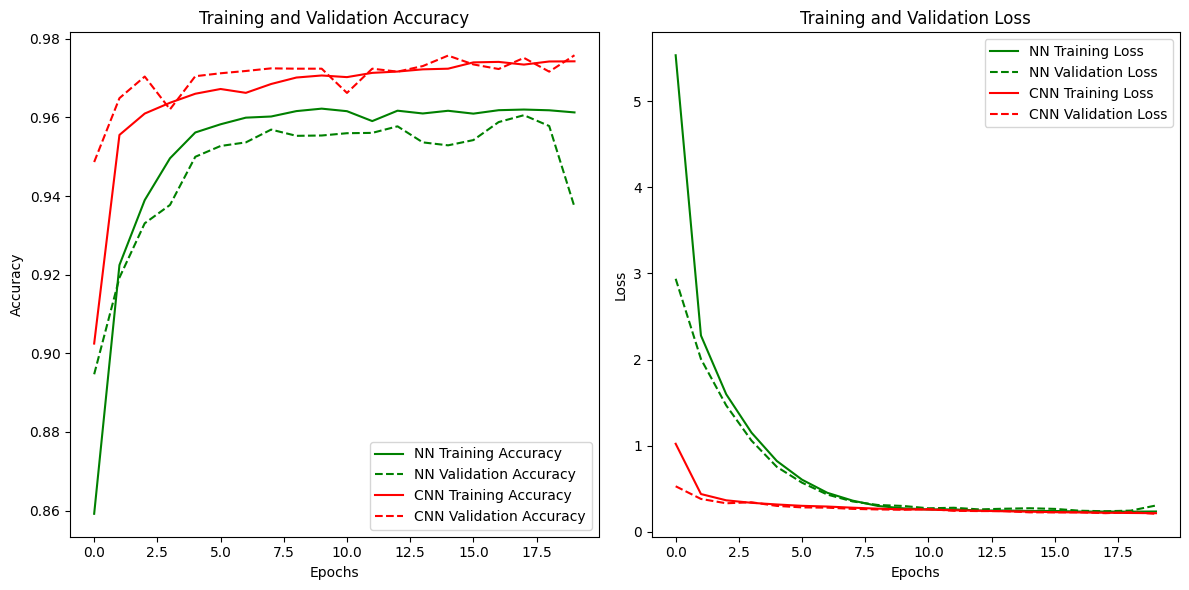

In [19]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(NNhistory.history['accuracy'], label='NN Training Accuracy', color='g')
plt.plot(NNhistory.history['val_accuracy'], label='NN Validation Accuracy', linestyle='--', color='g')
plt.plot(CNNhistory.history['accuracy'], label='CNN Training Accuracy', color='r')
plt.plot(CNNhistory.history['val_accuracy'], label='CNN Validation Accuracy', linestyle='--', color='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(NNhistory.history['loss'], label='NN Training Loss', color='g')
plt.plot(NNhistory.history['val_loss'], label='NN Validation Loss', linestyle='--',color='g')
plt.plot(CNNhistory.history['loss'], label='CNN Training Loss',color='r')
plt.plot(CNNhistory.history['val_loss'], label='CNN Validation Loss',linestyle='--',color='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

##### 4.2 Convolutional Neural Networks vs. Neural Networks

4.2.1 Handling Spatial Information

- Dense layers treat input data as flattened vectors, ignoring any spatial relationships between pixels.  
This can be suboptimal for tasks where spatial information is crucial, such as image classification. 
- In contrast, CNNs are specifically designed to handle spatial information in data like images.  
Convolutional layers use filters to capture local patterns, preserving the spatial relationships between pixels.  
This makes CNNs more effective for tasks like image recognition.

4.2.2 Parameter Sharing  

- In Standard Neural Network each neuron in a dense layer is connected to every neuron in the previous layer, resulting in a large number of parameters.  
This can lead to overfitting, especially when dealing with high-dimensional data like images,  
-  Convolutional layers on the other hand use shared weights (filters) across different regions of the input.  
This parameter sharing reduces the number of parameters and helps the network generalize better to variations in the input.


4.2.3 Translation Invariance  

- Standard Neural Network (Dense Layers) are sensitive to the absolute position of features in the input. If the position of a feature changes, the network may not recognize it.
-  CNNs, through the use of convolutional and pooling layers, are more robust to changes in the position of features. They exhibit some degree of translation invariance, making them well-suited for tasks where the location of features is less critical.

4.2.4 Data Efficiency  

- Standard Neural Network (Dense Layers) require a large number of parameters to capture spatial relationships, which can lead to a need for more data to avoid overfitting.
- CNNs are more data-efficient, especially when dealing with image data, as they leverage shared weights and hierarchical feature learning.

4.2.5 Performance on Image Data  

- Standard Neural Network (Dense Layers) can perform well on image data, they may struggle with large input sizes and complex spatial relationships.
- Convolutional Neural Network (CNN) are particularly effective for image-related tasks, such as image classification, object detection, and image segmentation, due to their ability to capture local patterns and spatial hierarchies.

##### 4.3 Details of Le-Net5

LeNet-5 is a pioneering Convolutional Neural Network (CNN) architecture designed by Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner. Introduced in 1998, LeNet-5 is one of the early successful attempts at using neural networks for image recognition tasks, specifically for handwritten digit recognition. LeNet-5 played a crucial role in demonstrating the effectiveness of CNNs for image recognition tasks. It inspired subsequent advancements in deep learning and convolutional architectures, becoming a foundational model in the history of neural networks

- LeNet-5 consists of two sets of convolutional layers followed by average pooling layers. Convolutional layers are crucial for capturing local features and patterns in the input images.
- Average pooling layers are used for subsampling. These layers reduce the spatial dimensions of the input while preserving important features. Subsampling contributes to translation invariance and makes the network less sensitive to small variations in the input.
- LeNet-5 incorporates a local response normalization (LRN) layer after the first two convolutional layers. LRN is designed to enhance the contrast between features and improve the generalization capabilities of the network.
- Following the convolutional and pooling layers, LeNet-5 has a couple of fully connected layers with a relatively small number of neurons. These layers combine the high-level features extracted by the convolutional layers for classification.
- The final layer flattens the output from the fully connected layers and connects to an output layer. The output layer has neurons corresponding to the number of classes in the classification task.